Mean Shift, Mode Seeking, and Clustering Yizong Cheng (Paper's link):

https://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.510.1222&rep=rep1&type=pdf

In [1]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
import numpy as np
import pandas as pd

# Change Polar (*theta* , *r*) to  Cartesian  (*x* , *y*) and vice versa

**Polar Coordinates (r,θ) to Cartesian Coordinates (x,y) :**

x = r × cos( θ ) 

y = r × sin( θ )

In [2]:
def read_polar_coordinates(data_name):
  # read data 
  # note: index 0 is theta , index 1 is r
  data = pd.read_csv(data_name).to_numpy()
  polar_data = np.copy(data)
  
  # Polar Coordinates (r,θ) to Cartesian Coordinates (x,y)
  for i in range(len(data)):
    x =  ( data[i][1] * (np.cos(data[i][0])) )
    y = ( data[i][1] * (np.sin(data[i][0])) )
    
    # theta of ith data is replaced with x
    data[i][0] = x
    # r of the ith data is replaced with y
    data[i][1] = y

  return data, polar_data

**Cartesian Coordinates (x,y) to Polar Coordinates (r,θ) :**

$x = r × cos( θ )$

$y = r × sin( θ )$

Where we can find  $θ$ and $r$ as folllows:

$x^2 + y^2 = r^2 cos^2θ + r^2 sin^2θ$ 

$  \ \ \ \ \ \ \ \ \ \ \  \ \ = r^2 ( cos^2θ +  sin^2θ )$

$  \ \ \ \ \ \ \ \ \ \ \  \ \ =  r^2 $

Therefore: 

$ r = \sqrt{x^2 + y^2} $

And 

$x = r × cos( θ )  $ 

→ $\ x/r =  cos( θ )$

→ $\ θ = \ cos^{-1}(x/r) $




In [3]:
def centroids_to_polar(x, y):
  # Cartesian Coordinates (x,y) to Polar Coordinates (r,θ) :
  r = np.sqrt(np.power(x,2)  +  np.power(y,2))
  theta = np.arccos(x/r)

  return np.array([theta, r])

**Clustering and plot:**

In [4]:
def cluster_and_plot(data , polar_data):
  plt.scatter(data[:,0] , data[:,1], s = 150)
  plt.show()

  clustering = MeanShift()
  clustering.fit(data)


  centroids = clustering.centroids
  
  polar_centroids = []
  for i in range(len(centroids)):
    # x = centroids[i][0] ,  y = centroids[i][1]
    polar_centroids.append(centroids_to_polar( centroids[i][0] , centroids[i][1]))
  
  polar_centroids = np.array(polar_centroids)

  plt.scatter(data[:,0] , data[:,1], s = 150)

  for c in centroids:
    plt.scatter(centroids[c][0],centroids[c][1], color = 'k', marker = '*', s = 150)
  
  plt.show()

  plt.polar(polar_data[:,0] , polar_data[:,1] , 'ro' )
  plt.polar(polar_centroids[:,0] , polar_centroids[:,1] , 'bo' )
  plt.show()

  return polar_centroids

# Mean-Shift Class (Simple version)

https://www.youtube.com/watch?v=P-iAd8b7zl4


In [14]:
class MeanShift():
  def __init__(self, radius= 4):
    self.radius = radius

  def fit(self, data):
    centroids = {}
    
    for i in range(len(data)):
      centroids[i] = data[i]

    while True:
      new_centroids = []

      for i in centroids:
        in_bandwidth = []
        centroid = centroids[i]

        for featureset in data:
          if np.linalg.norm(featureset - centroid) < self.radius:
            in_bandwidth.append(featureset)

        new_centroid = np.average(in_bandwidth, axis= 0)
        new_centroids.append(tuple(new_centroid)) #tuple let us use set in the next line

      
      uniques = sorted(list(set(new_centroids)))

      prev_centroids =  dict(centroids)

      centroids = {}
      for i in range(len(uniques)):
        centroids[i] = np.array(uniques[i])

      optimized = True

      for i in centroids:
        if not np.array_equal(centroids[i], prev_centroids[i]):
          optimized = False

        if not optimized:
          break

      if optimized:
        break
    
    self.centroids = centroids

  def predict(self, data):
    pass

# Data Clustring and visualizing with Simple MeanShift

**Data 1  - simple shift**

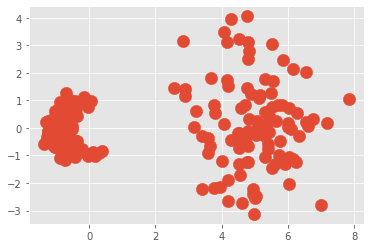

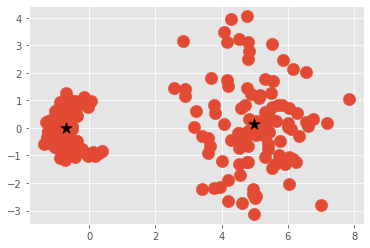

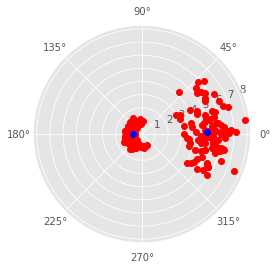

2 centers:
 [[3.12346908 0.69534494]
 [0.02696556 4.97545502]]


In [6]:
# results of data 1 - simple mean_shift - radius = 4
data_1, data_1_polar = read_polar_coordinates('data1.csv')
centroids = cluster_and_plot(data_1, data_1_polar)
print(len(centroids), 'centers:\n',  centroids)

**Data 2  - simple shift**

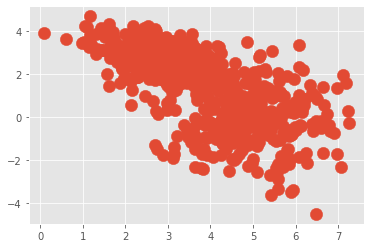

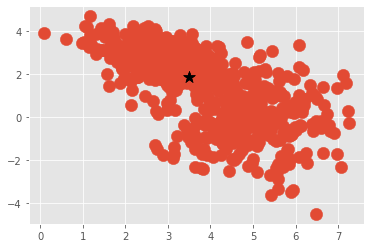

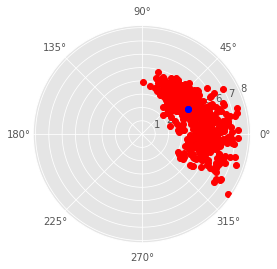

2 centers:
 [[0.49301264 3.96253419]
 [0.49055381 3.96377911]]


In [7]:
# results of data 2 - simple mean_shift - radius = 4
data_2, data_2_polar = read_polar_coordinates('data2.csv')
centroids = cluster_and_plot(data_2, data_2_polar)
print(len(centroids), 'centers:\n',  centroids)

**Data 3  - simple shift**

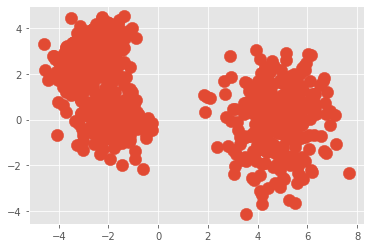

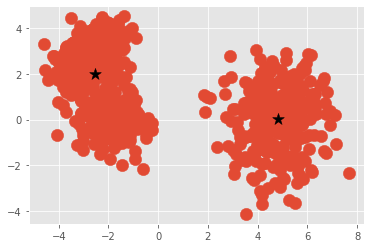

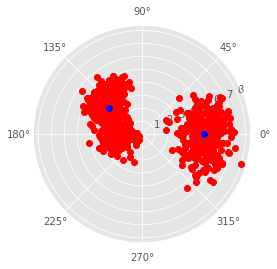

2 centers:
 [[2.47877232e+00 3.22677550e+00]
 [3.97125692e-03 4.79949484e+00]]


In [8]:
# results of data 3 - simple mean_shift - radius = 4
data_3, data_3_polar = read_polar_coordinates('data3.csv')
centroids = cluster_and_plot(data_3, data_3_polar)
print(len(centroids), 'centers:\n',  centroids)

**Data 4 - simple shift**

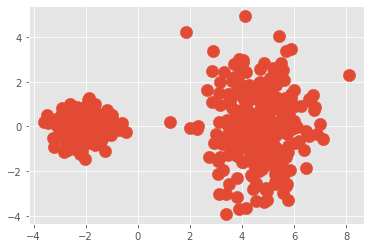

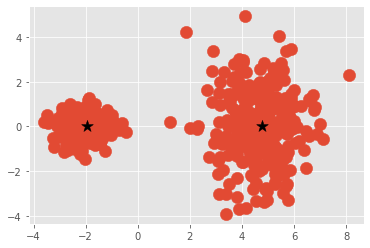

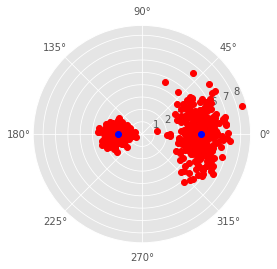

2 centers:
 [[3.13417273e+00 1.95166213e+00]
 [2.90206579e-03 4.77141828e+00]]


In [11]:
# results of data 4 - simple mean_shift - radius = 3
data_4, data_4_polar = read_polar_coordinates('data4.csv')
centroids = cluster_and_plot(data_4, data_4_polar)
print(len(centroids), 'centers:\n',  centroids)

**Data 5 - simple shift**

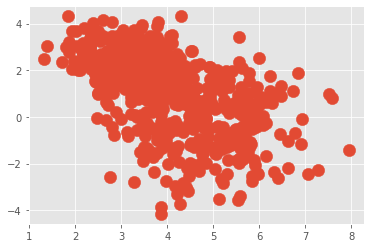

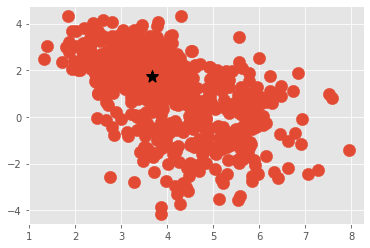

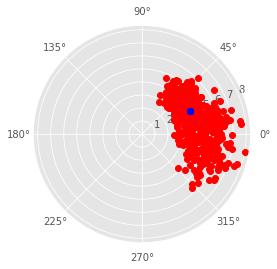

4 centers:
 [[0.44521068 4.06526251]
 [0.44414764 4.06505006]
 [0.44214325 4.06321289]
 [0.44108283 4.06367116]]


In [12]:
# results of data 5 - simple mean_shift - radius = 3
data_5, data_5_polar = read_polar_coordinates('data5.csv')
centroids = cluster_and_plot(data_5, data_5_polar)
print(len(centroids), 'centers:\n',  centroids)

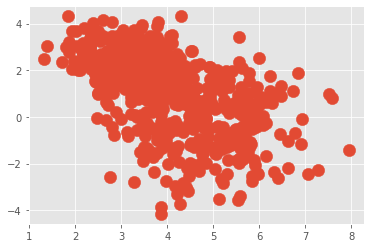

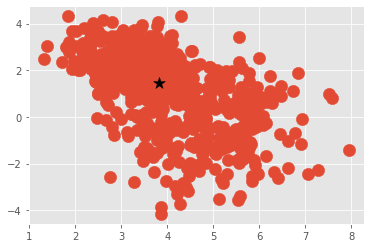

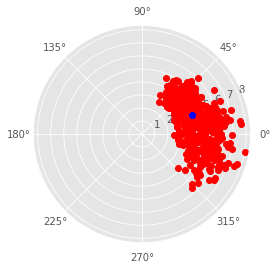

1 centers:
 [[0.36689688 4.08126882]]


In [9]:
# results of data 5 - simple mean_shift - radius = 4
data_5, data_5_polar = read_polar_coordinates('data5.csv')
centroids = cluster_and_plot(data_5, data_5_polar)
print(len(centroids), 'centers:\n',  centroids)

**Data 6 - simple shift**

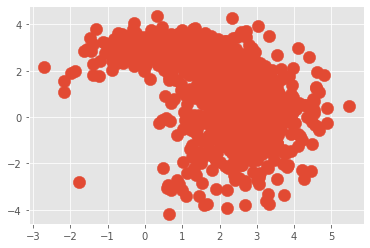

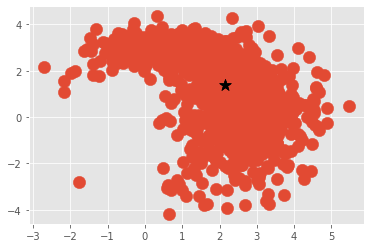

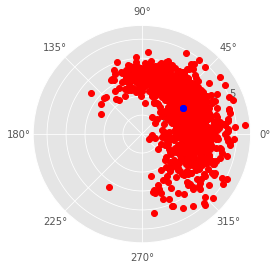

2 centers:
 [[0.56703184 2.55277688]
 [0.56600648 2.55161195]]


In [13]:
# results of data 6 - simple mean_shift - radius = 3
data_6, data_6_polar = read_polar_coordinates('data6.csv')
centroids = cluster_and_plot(data_6, data_6_polar)
print(len(centroids), 'centers:\n',  centroids)

**Data 7 - simple shift**

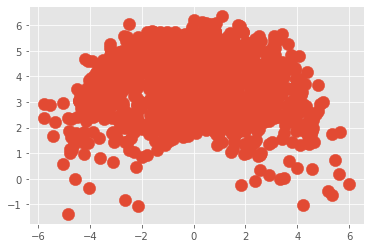

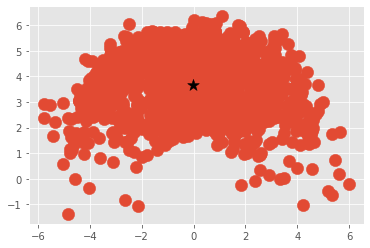

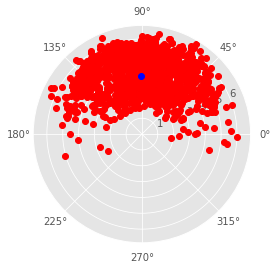

1 centers:
 [[1.57815016 3.65315919]]


In [15]:
# results of data 7 - simple mean_shift - radius = 7
data_7, data_7_polar = read_polar_coordinates('data7.csv')
centroids = cluster_and_plot(data_7, data_7_polar)
print(len(centroids), 'centers:\n',  centroids)